In [21]:
import pandas as pd
import os
import sys
import yfinance as yf
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pynance as pn




In [27]:
# Define the path to the data directory
data_directory = 'c:/Users/Yibabe/Desktop/kifiyaweek1/data'

# List of CSV filenames
csv_files = [
    'AAPL_historical_data.csv',
    'AMZN_historical_data.csv',
    'GOOG_historical_data.csv',
    'META_historical_data.csv',
    'MSFT_historical_data.csv',
    'NVDA_historical_data.csv',
    'TSLA_historical_data.csv'
]

# Create a dictionary to hold DataFrames
dfs = {}

# Load CSV files into DataFrames
for file in csv_files:
    file_path = os.path.join(data_directory, file)
    dfs[file] = pd.read_csv(file_path)

# Save the loaded DataFrames for later use
# Optionally, you can save the dictionary or each DataFrame separately
# e.g., dfs['AAPL_historical_data.csv'].to_pickle('AAPL_data.pkl')


Processing AAPL_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


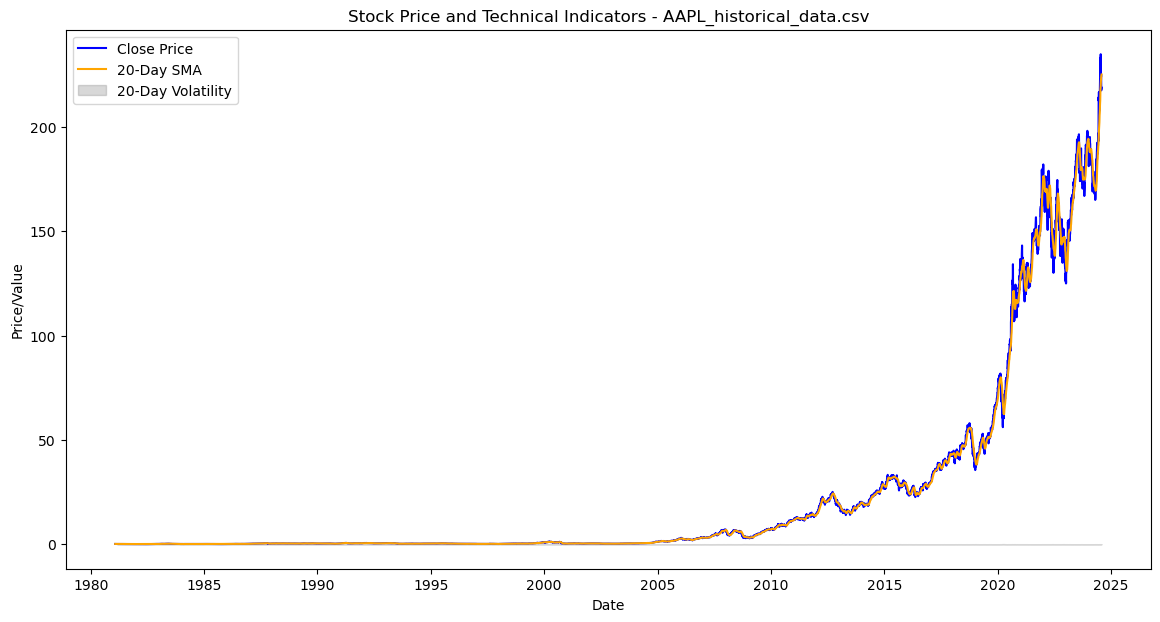

Processing AMZN_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


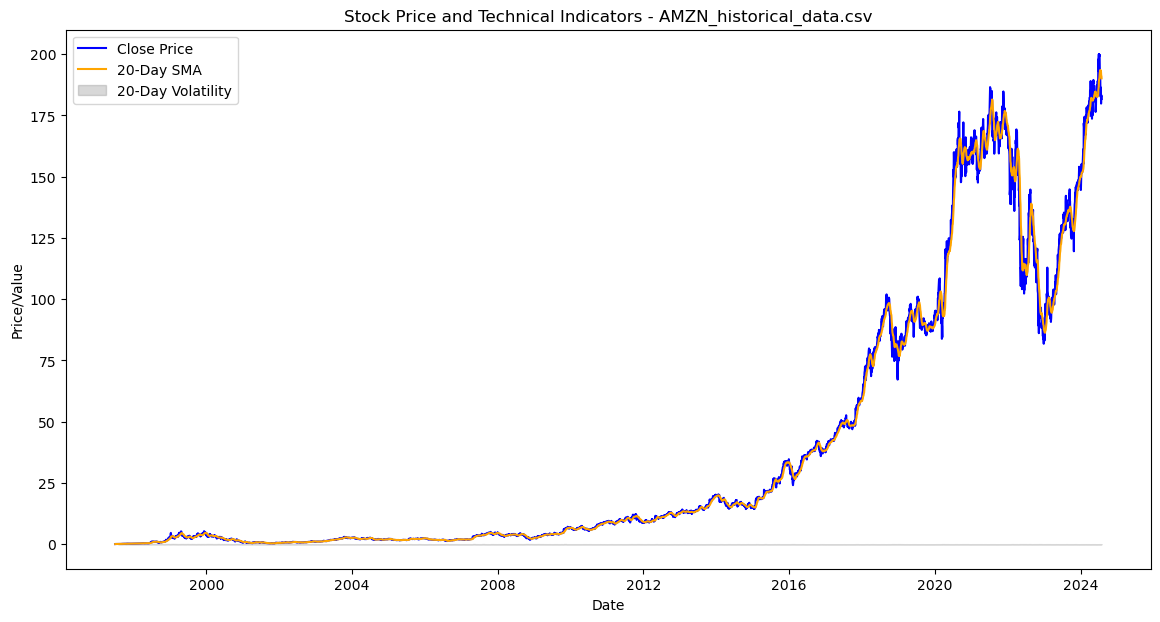

Processing GOOG_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


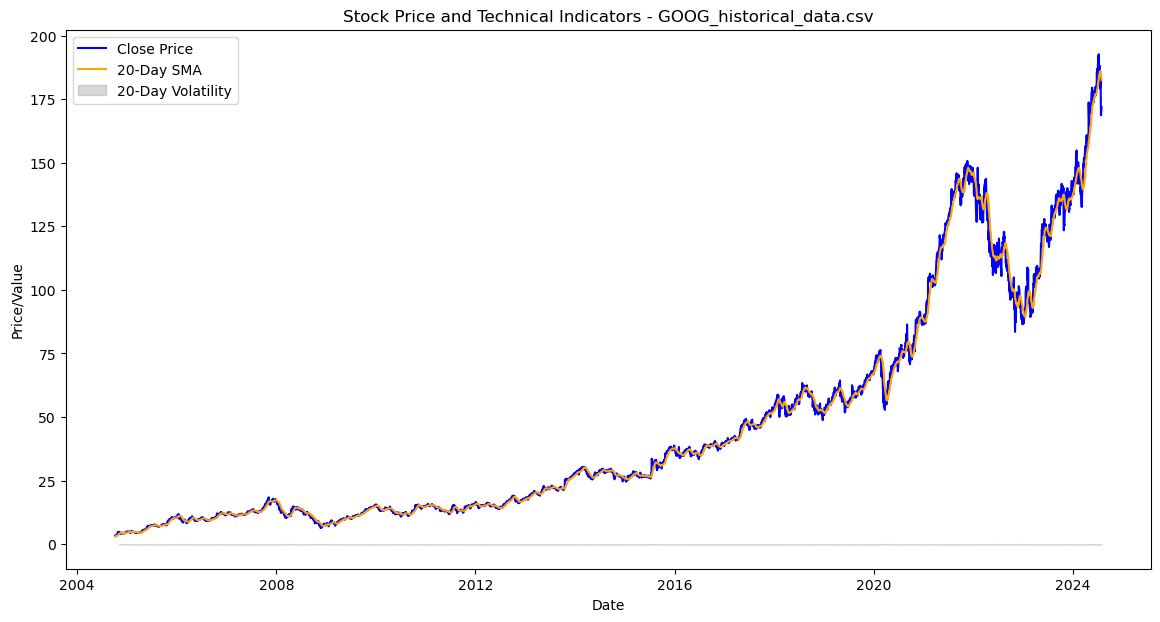

Processing META_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


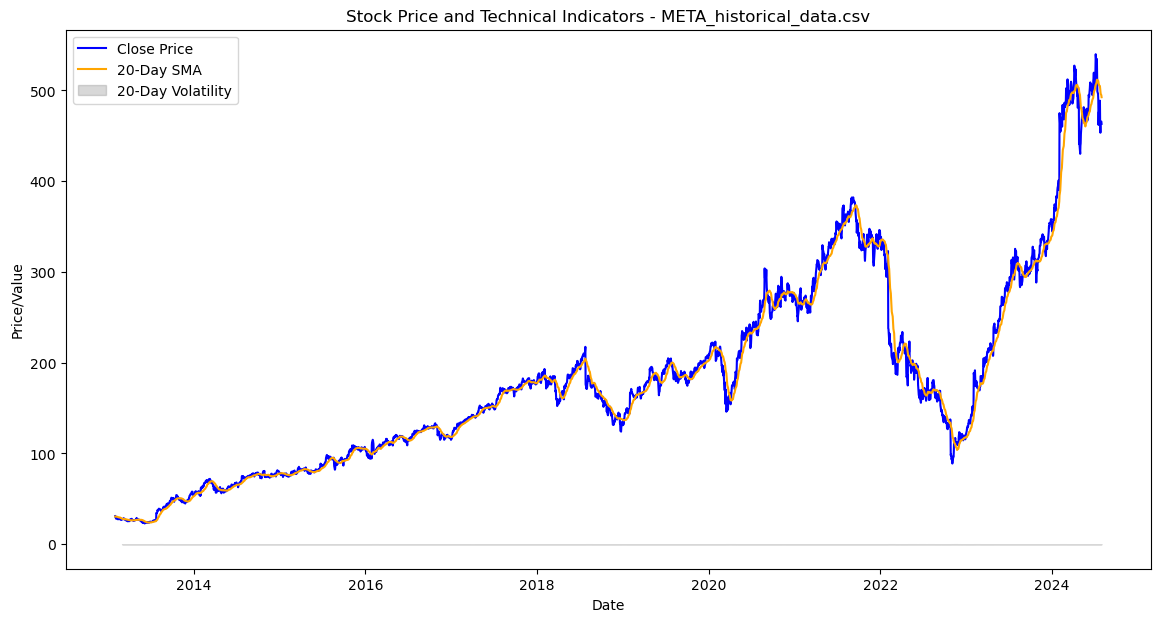

Processing MSFT_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


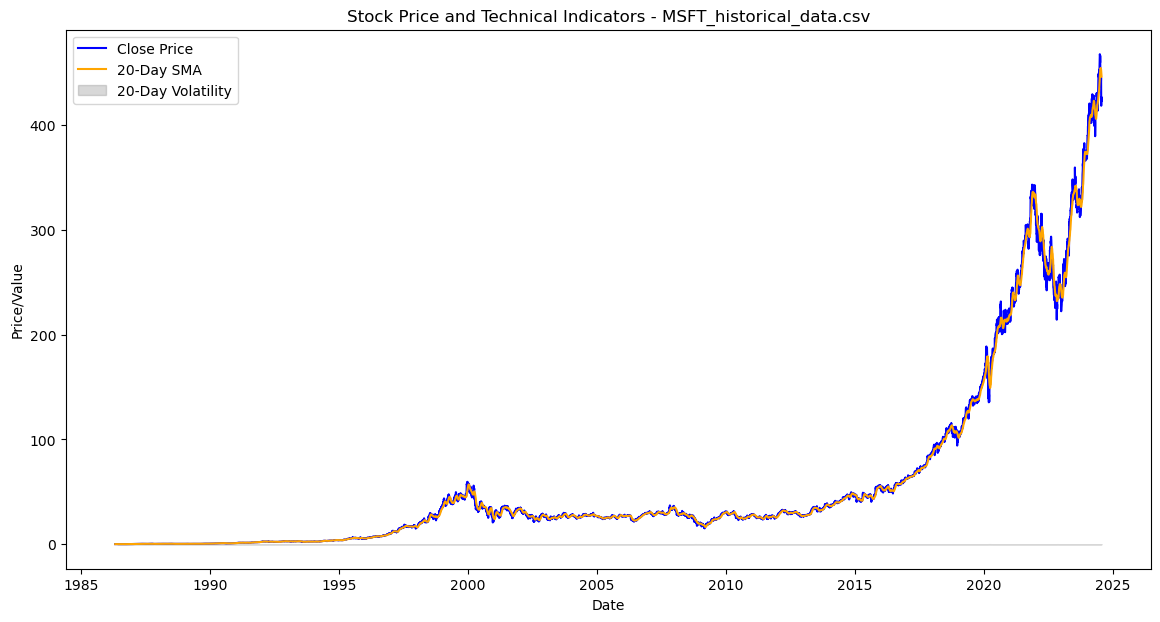

Processing NVDA_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


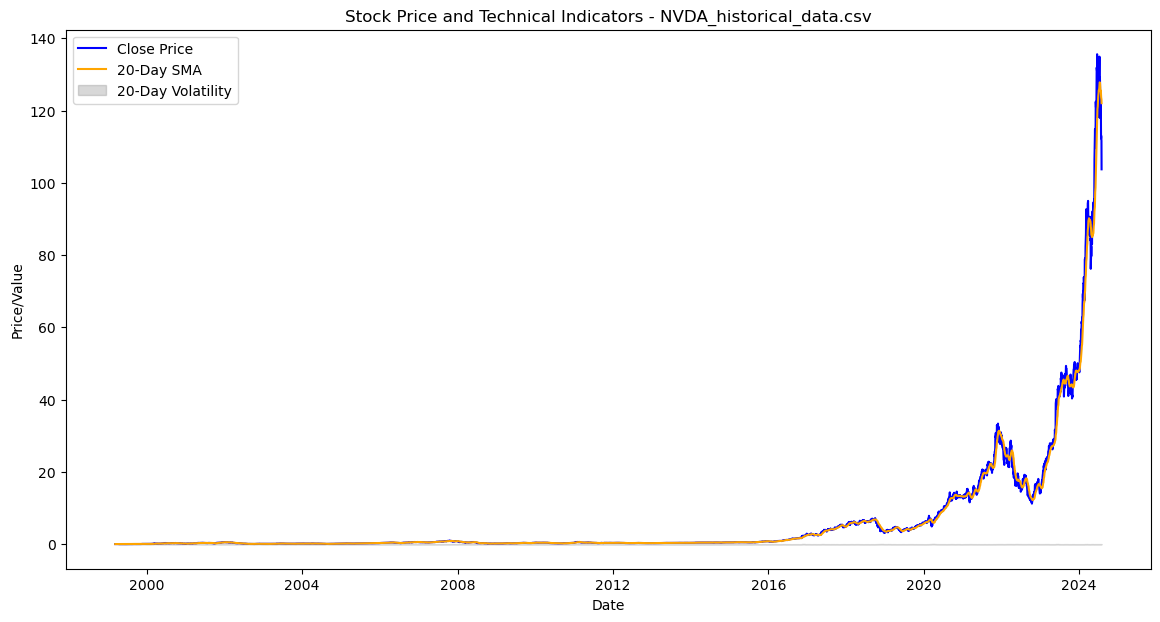

Processing TSLA_historical_data.csv with columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']


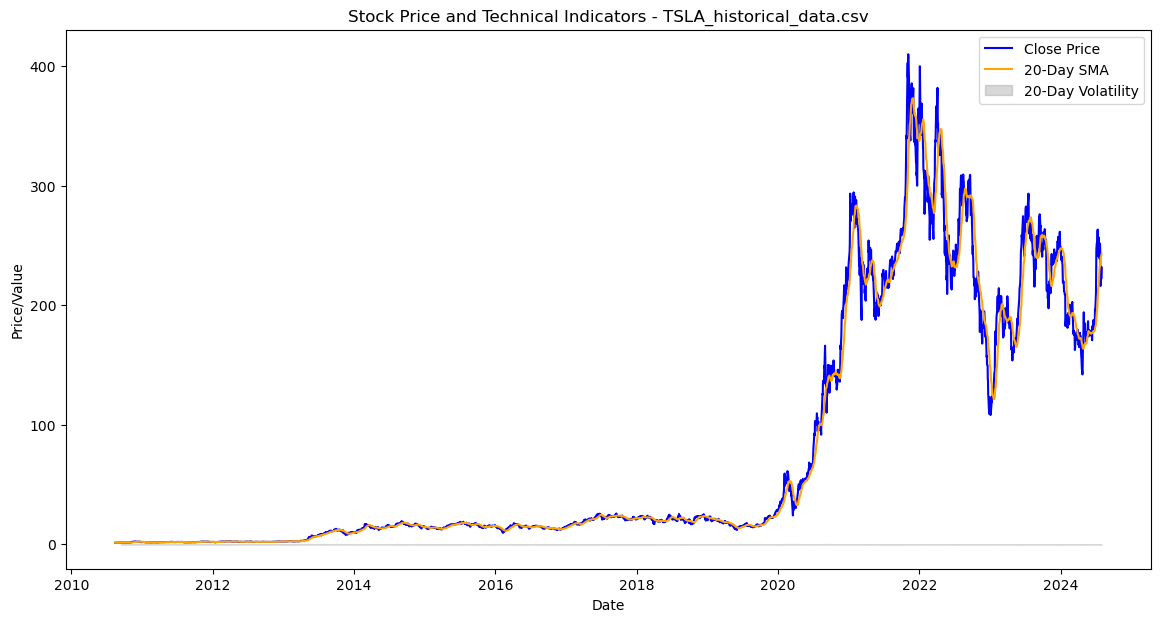

In [30]:
import talib
import matplotlib.pyplot as plt

# Assuming you have the DataFrames loaded into `dfs`
# If you're running this separately, ensure dfs is defined or load from a saved state

# Example: if you've saved the DataFrames earlier
# dfs['AAPL_historical_data.csv'] = pd.read_pickle('AAPL_data.pkl')
import matplotlib.pyplot as plt

# Iterate over each DataFrame in the dictionary
for name, df in dfs.items():
    # Print column names to verify
    print(f"Processing {name} with columns: {df.columns.tolist()}")

    # Check if 'Date' column exists, if not skip this DataFrame
    if 'Date' not in df.columns:
        print(f"Skipping {name}: 'Date' column not found.")
        continue

    # Ensure proper datetime conversion and sorting
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.sort_values('Date')
    
    # Remove rows with missing or invalid dates
    df = df.dropna(subset=['Date'])

    # Calculate daily returns if not already calculated
    if 'Returns' not in df.columns:
        df['Returns'] = df['Close'].pct_change()

    # Calculate technical indicators if not already calculated
    if 'SMA_20' not in df.columns:
        df['SMA_20'] = df['Close'].rolling(window=20).mean()
    if 'Volatility' not in df.columns:
        df['Volatility'] = df['Returns'].rolling(window=20).std()

    # Plot Close Price, SMA, and Volatility
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='orange')
    plt.fill_between(df['Date'], df['Volatility'], color='gray', alpha=0.3, label='20-Day Volatility')
    plt.xlabel('Date')
    plt.ylabel('Price/Value')
    plt.title(f'Stock Price and Technical Indicators - {name}')
    plt.legend()
    plt.show()




Technical indicators applied to AAPL_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  0.113839  0.109710  51.150811 -0.003503    -0.005209   0.001706
67  0.114955  0.110045  52.312346 -0.002731    -0.004713   0.001982
68  0.119420  0.110519  56.743973 -0.001739    -0.004119   0.002379
69  0.118862  0.111161  56.043044 -0.000987    -0.003492   0.002506
70  0.116629  0.111356  53.210390 -0.000564    -0.002906   0.002343


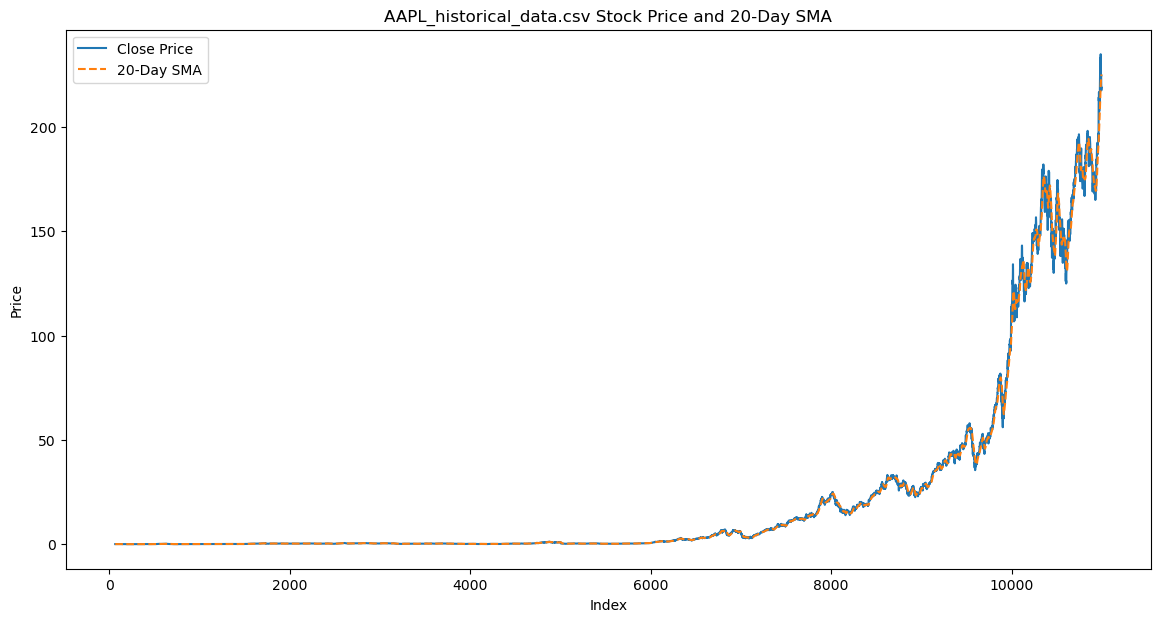

Technical indicators applied to AMZN_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  0.108333  0.113216  53.424093 -0.000507     0.001618  -0.002125
67  0.108333  0.112904  53.424093 -0.000613     0.001171  -0.001784
68  0.105729  0.112539  51.014953 -0.000896     0.000758  -0.001654
69  0.106250  0.112279  51.486336 -0.001067     0.000393  -0.001460
70  0.110938  0.112018  55.624296 -0.000814     0.000152  -0.000966


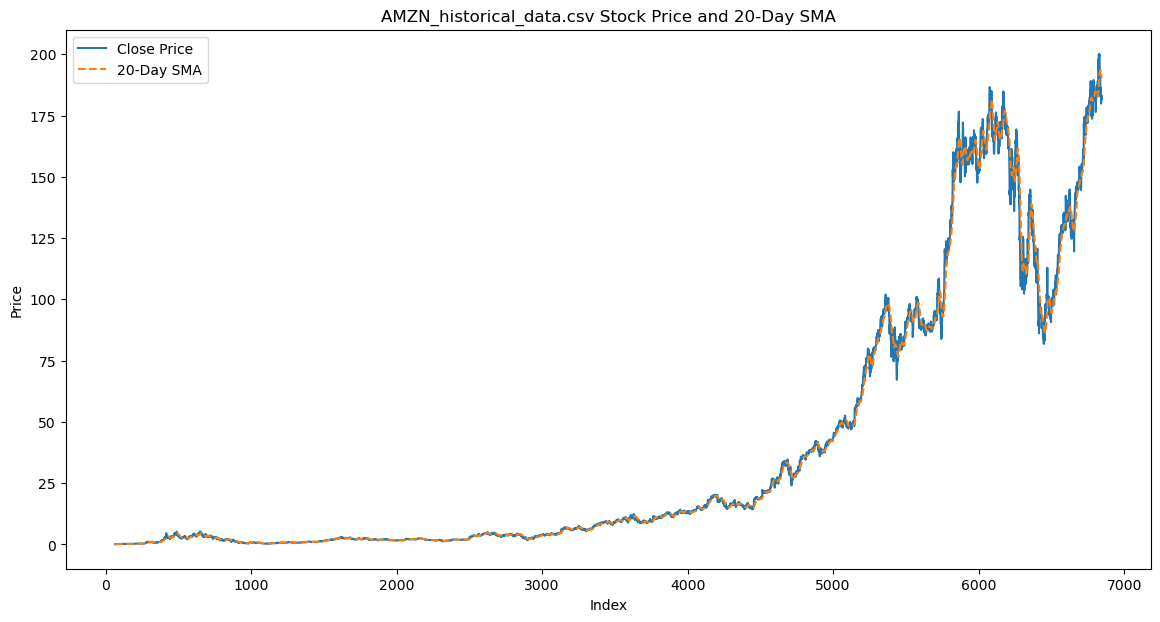

Technical indicators applied to GOOG_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  4.112087  4.476234  48.035284  0.170555     0.330738  -0.160182
67  4.172361  4.458451  49.853971  0.142921     0.293174  -0.150253
68  4.352685  4.444491  54.935469  0.134026     0.261344  -0.127319
69  4.468003  4.427168  57.875282  0.134729     0.236021  -0.101293
70  4.509348  4.415226  58.910259  0.137042     0.216225  -0.079183


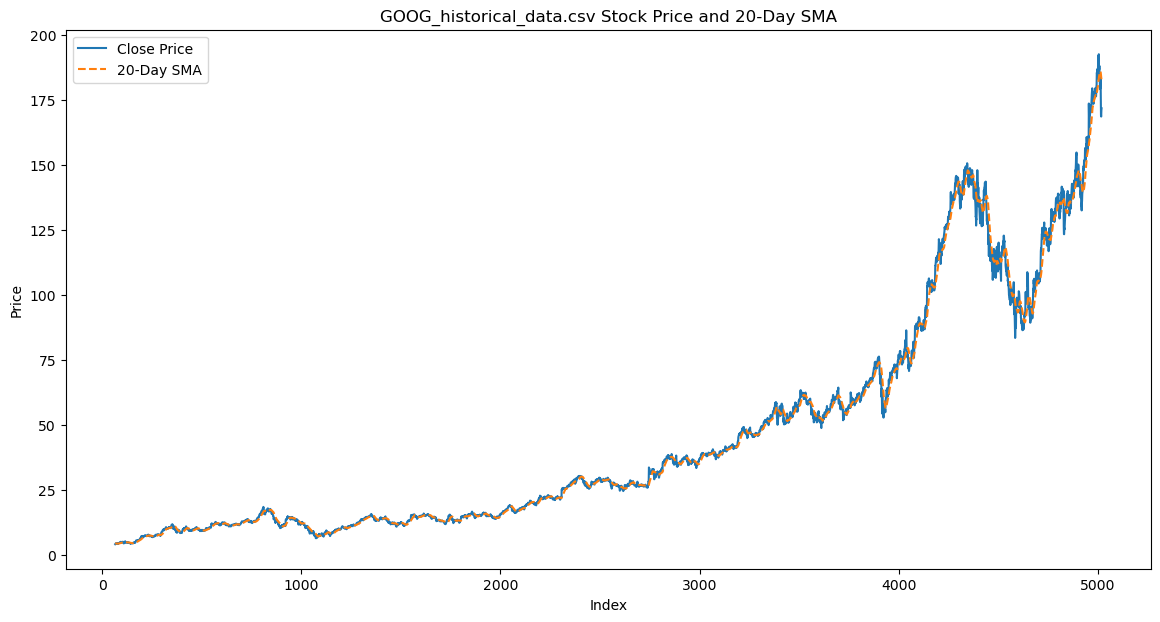

Technical indicators applied to META_historical_data.csv.
        Close  SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  25.860001  27.292  30.404452 -0.619437    -0.537694  -0.081742
67  25.740000  27.215  29.759036 -0.667910    -0.563737  -0.104172
68  25.730000  27.145  29.702450 -0.699073    -0.590805  -0.108269
69  25.129999  27.038  26.452484 -0.763386    -0.625321  -0.138065
70  25.209999  26.929  27.590130 -0.798692    -0.659995  -0.138697


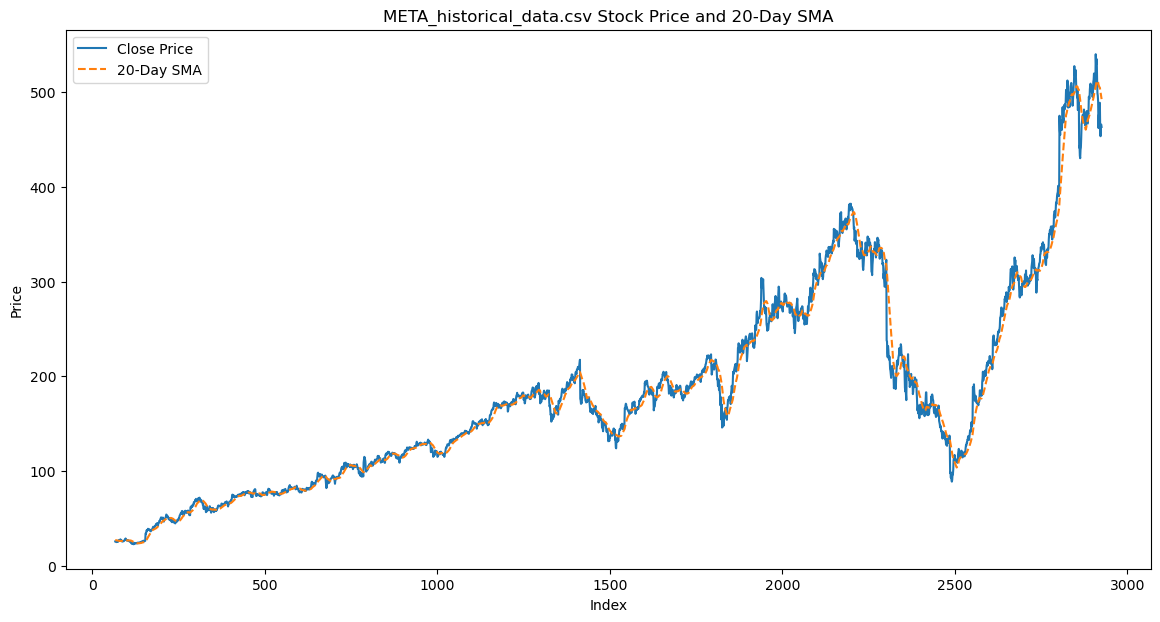

Technical indicators applied to MSFT_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  0.110243  0.113325  43.102709 -0.000073     0.001104  -0.001178
67  0.109375  0.113325  41.237403 -0.000274     0.000829  -0.001103
68  0.108507  0.113368  39.401124 -0.000498     0.000563  -0.001061
69  0.108941  0.113433  40.820116 -0.000633     0.000324  -0.000957
70  0.110243  0.113563  44.982278 -0.000628     0.000134  -0.000761


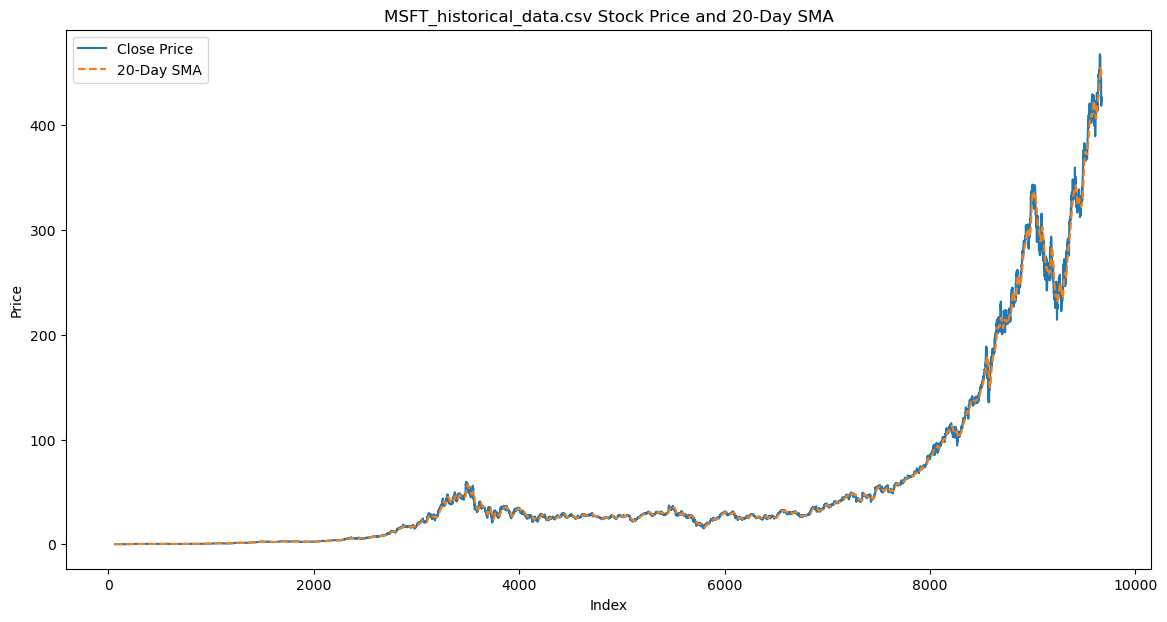

Technical indicators applied to NVDA_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  0.037500  0.040208  43.263810 -0.001529    -0.000996  -0.000532
67  0.037500  0.039883  43.263810 -0.001496    -0.001096  -0.000399
68  0.038021  0.039648  44.839073 -0.001411    -0.001159  -0.000252
69  0.038281  0.039492  45.650071 -0.001308    -0.001189  -0.000119
70  0.036198  0.039284  40.511291 -0.001379    -0.001227  -0.000152


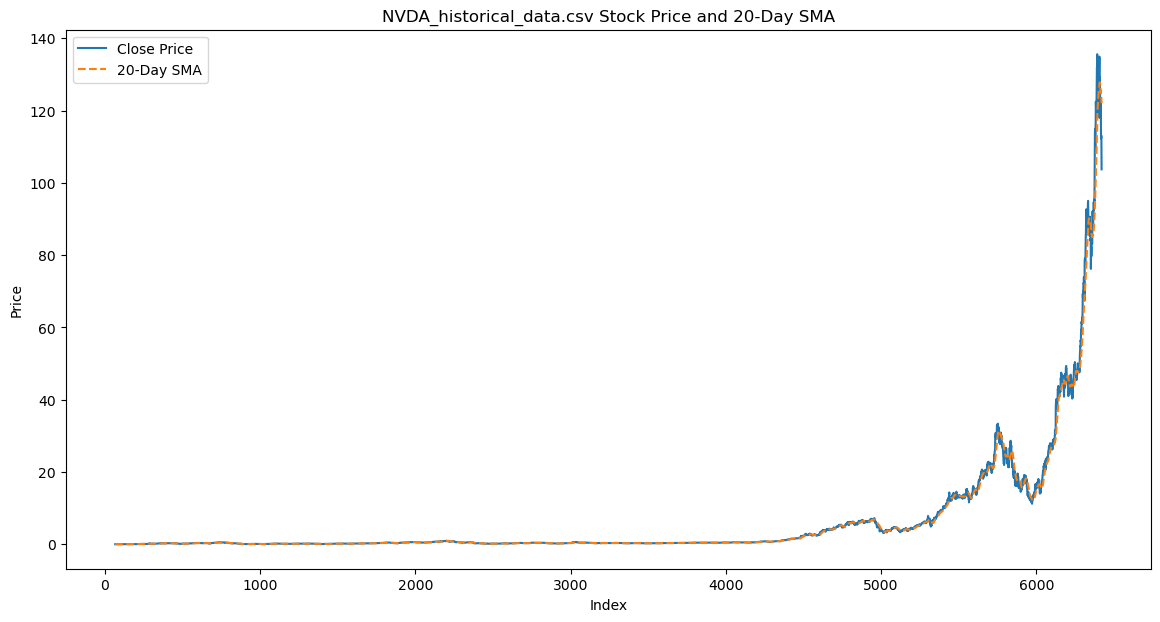

Technical indicators applied to TSLA_historical_data.csv.
       Close    SMA_20        RSI      MACD  MACD_Signal  MACD_Hist
66  1.373333  1.382133  52.056543  0.023779     0.029346  -0.005567
67  1.399333  1.381933  54.360657  0.023375     0.028152  -0.004777
68  1.408000  1.383867  55.134699  0.023483     0.027218  -0.003735
69  1.364000  1.382400  50.456177  0.019790     0.025732  -0.005942
70  1.362000  1.381467  50.247461  0.016512     0.023888  -0.007377


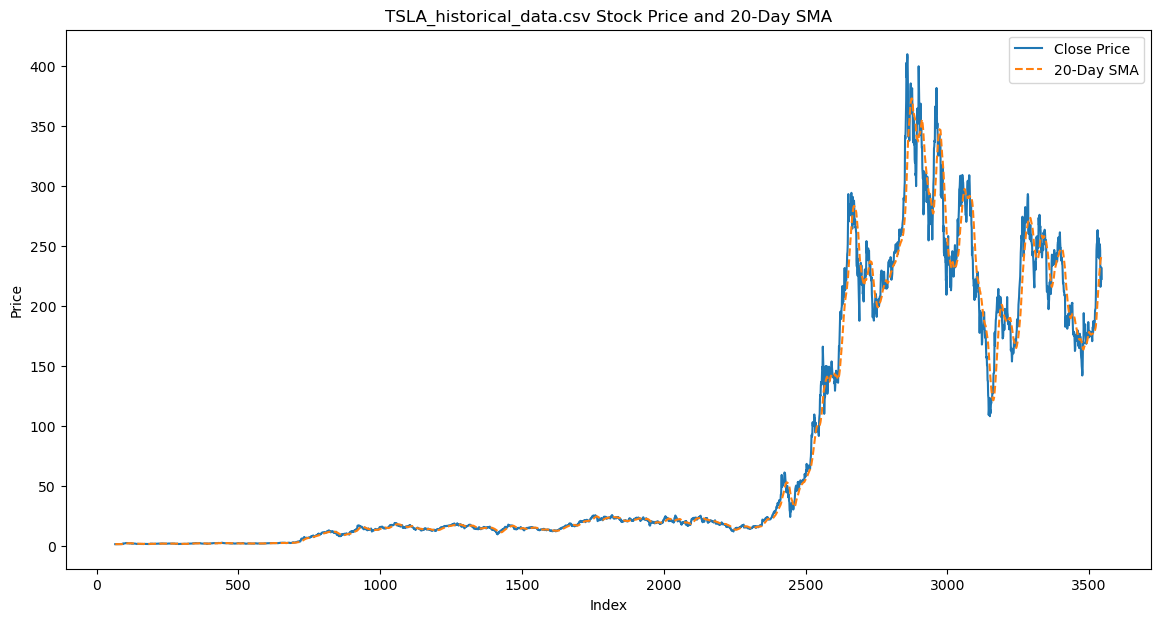

In [31]:
# Apply technical indicators to each DataFrame
for name, df in dfs.items():
    # Ensure 'Close' column is a float for TA-Lib functions
    df['Close'] = df['Close'].astype(float)
    
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # Remove rows with NaN values for clean analysis
    df = df.dropna()

    # Save the cleaned DataFrame back to the dictionary
    dfs[name] = df

    print(f"Technical indicators applied to {name}.")
    print(df[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']].head())

    # Visualization example (adjust date indexing if needed)
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_20'], label='20-Day SMA', linestyle='--')
    plt.title(f'{name} Stock Price and 20-Day SMA')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [32]:

from pypfopt import expected_returns, risk_models, EfficientFrontier



In [36]:
# Fetch data for the desired tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Fetch historical data
data = pn.data.get(tickers, start=start_date, end=end_date)


Data columns: MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'NVDA'),
            ( 'Close', 'TSLA'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'MSFT'),
            (  'High', 'NVDA'),
            (  'High', 'TSLA'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'MSFT'),
            (   'Low', 'NVDA'),
            (   'Low', 'TSLA'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'MSFT'),
            (  'Open', 'NVDA'),
            (  'Open', 'TSLA'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GO

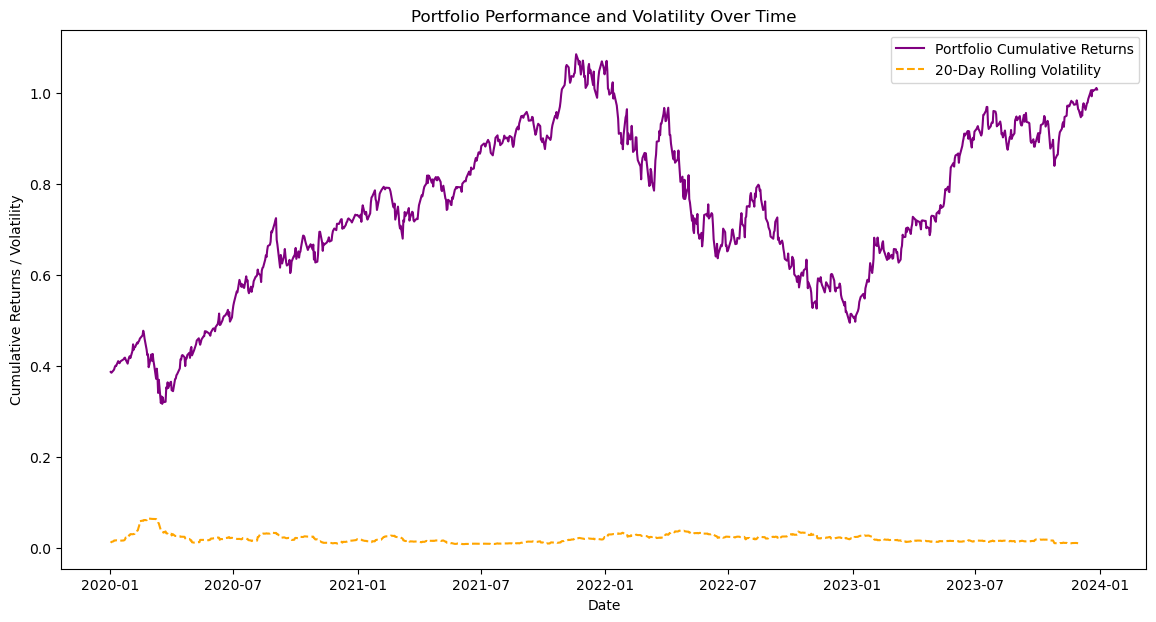

In [40]:


# Fetch data for the desired tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Fetch historical data
data = pn.data.get(tickers, start=start_date, end=end_date)

# Print the first few rows and column names to verify
print("Data columns:", data.columns)
print(data.head())

# Extract 'Close' prices for the tickers
close_prices = data['Close']

# Calculate daily returns
returns = close_prices.pct_change()

# Define portfolio weights (equal weights as an example)
weights = np.array([1/len(tickers)] * len(tickers))

# Calculate weighted returns for the portfolio
portfolio_returns = returns.dot(weights)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Calculate rolling volatility (e.g., 20-day)
rolling_volatility = portfolio_returns.rolling(window=20).std()

# Visualization
plt.figure(figsize=(14, 7))

# Plot cumulative returns
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Returns', color='purple')

# Plot rolling volatility
plt.plot(rolling_volatility.index, rolling_volatility, label='20-Day Rolling Volatility', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Cumulative Returns / Volatility')
plt.title('Portfolio Performance and Volatility Over Time')
plt.legend()
plt.show()


In [45]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns

Date
2023-12-29         NaN
2023-12-28    1.006661
2023-12-27    1.010193
2023-12-26    1.007541
2023-12-22    1.003650
                ...   
2020-01-08    0.397025
2020-01-07    0.391894
2020-01-06    0.389715
2020-01-03    0.384665
2020-01-02    0.386437
Length: 1006, dtype: float64

In [46]:
rolling_volatility = portfolio_returns.rolling(window=20).std()
rolling_volatility 

Date
2023-12-29         NaN
2023-12-28         NaN
2023-12-27         NaN
2023-12-26         NaN
2023-12-22         NaN
                ...   
2020-01-08    0.016237
2020-01-07    0.016231
2020-01-06    0.014372
2020-01-03    0.013034
2020-01-02    0.011193
Length: 1006, dtype: float64

In [47]:
annualized_returns = (1 + portfolio_returns.mean()) ** 252 - 1
annualized_returns

-0.16170472572909167

In [48]:
risk_free_rate = 0.01  # Example risk-free rate
sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_returns.std()
sharpe_ratio

-0.4801424073644777